In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
IMG_SIZE = 64
DATA_DIR = DATA_DIR = r"C:\Users\AARYAMAN\Downloads\Lab-1\Lab-1\transport"


def load_images(folder, label):
    data = []
    labels = []
    
    path = os.path.join(DATA_DIR, folder)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img = np.array(img) / 255.0
            img = img.reshape(-1)   # flatten
            data.append(img)
            labels.append(label)
        except:
            pass
            
    return data, labels


In [6]:
cars_X, cars_y = load_images("cars", 1)
bikes_X, bikes_y = load_images("bike", 0)

X = np.array(cars_X + bikes_X).T
Y = np.array(cars_y + bikes_y).reshape(1, -1)

print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (12288, 785)
Y shape: (1, 785)


In [7]:
m = X.shape[1]
perm = np.random.permutation(m)
X = X[:, perm]
Y = Y[:, perm]

split = int(0.8 * m)
X_train, X_test = X[:, :split], X[:, split:]
Y_train, Y_test = Y[:, :split], Y[:, split:]


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [9]:
def initialize(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


In [10]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    return dw, db, cost


In [11]:
def optimize(w, b, X, Y, iters, lr):
    costs = []
    
    for i in range(iters):
        dw, db, cost = propagate(w, b, X, Y)
        w -= lr * dw
        b -= lr * db
        
        if i % 100 == 0:
            costs.append(cost)
    
    return w, b, costs


In [12]:
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)


In [13]:
w, b = initialize(X_train.shape[0])
w, b, costs = optimize(w, b, X_train, Y_train, iters=2000, lr=0.01)


In [14]:
Y_train_pred = predict(w, b, X_train)
Y_test_pred = predict(w, b, X_test)

train_acc = 100 - np.mean(np.abs(Y_train_pred - Y_train)) * 100
test_acc = 100 - np.mean(np.abs(Y_test_pred - Y_test)) * 100

print("Train Accuracy:", train_acc, "%")
print("Test Accuracy:", test_acc, "%")


Train Accuracy: 76.43312101910828 %
Test Accuracy: 64.3312101910828 %


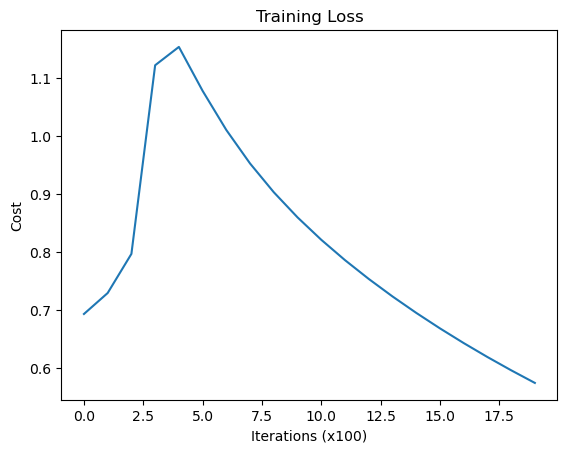

In [15]:
plt.plot(costs)
plt.xlabel("Iterations (x100)")
plt.ylabel("Cost")
plt.title("Training Loss")
plt.show()
